# STAT 557: Project 3 - Decision Trees

By: Rakshith Badarinath
Date: 11/05/2017

The aim of this project is to practice tree structured classiﬁers.  

Requirements for the project are listed below.
1. Implement a tree structured classiﬁer using the splitting method in CART and a chosen split stopping criterion. Example stopping criteria: 
    1. the goodness of split is lower than a threshold, 
    2. the number of leaf nodes reaches a limit, 
    3. the number of samples in every leaf is below a threshold.
2. Optional: implement CART. If you ﬁnish this requirement, you don’t need to do the ﬁrst one.
3. Apply your tree structured classiﬁer to a data set and evaluate it.
4. Write a report. Provide pseudo-code of your algorithm. Describe the decision tree obtained for your dataset: what are the candidate splits used, what are the splits in the tree, what is the goodness of every split, how many training and testing samples fall into each node, what is the resubstitution error rate of the tree. As usual, you are required to explain the contribution of each individual group member.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

%matplotlib inline

## About Wine Data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
-- The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it)
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash 
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 

Number of Instances:
1. class 1: 59
2. class 2: 71
3. class 3: 48

Total number of samples: 178

Number of Attributes: 13

All attributes are continuous

Missing Attribute Values: None

## Import Data


In [2]:
from sklearn.datasets import load_wine 

X, y = load_wine(return_X_y=True)
feature_names=['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']
target_names=['class 0', 'class 1', 'class 2']
class_label = ['Class Label']

# create table for representation
data = pd.DataFrame(data=X, columns=feature_names)
wine_data = data.assign(class_label=y) #add new column for class label
#wine_data['Class Label'] = y # Option-2

In [3]:
# Display Wine Data
wine_data

Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total Phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
5      14.20        1.76  2.45               15.2      112.0           3.27   
6      14.39        1.87  2.45               14.6       96.0           2.50   
7      14.06        2.15  2.61               17.6      121.0           2.60   
8      14.83        1.64  2.17               14.0       97.0           2.80   
9      13.86        1.35  2.27               16.0       98.0           2.98   
10     14.10        2.16  2.30               18.0      105.0           2.95   
11     14.12        1.48  2.32               16.8       95.0           2.20   
12     13.75        1.73  2.41               16.0       89.0           2.60   
13     14.75        1.73  2.39               11.4       91.0           3.10   
14     14.38        1.87  2.38               12.0      102.0           3.30   
15     13.63        1.81  2.70               17.2      112.0           2.85   
16     14.30        1.92  2.72               20.0      120.0           2.80   
17     13.83        1.57  2.62               20.0      115.0           2.95   
18     14.19        1.59  2.48               16.5      108.0           3.30   
19     13.64        3.10  2.56               15.2      116.0           2.70   
20     14.06        1.63  2.28               16.0      126.0           3.00   
21     12.93        3.80  2.65               18.6      102.0           2.41   
22     13.71        1.86  2.36               16.6      101.0           2.61   
23     12.85        1.60  2.52               17.8       95.0           2.48   
24     13.50        1.81  2.61               20.0       96.0           2.53   
25     13.05        2.05  3.22               25.0      124.0           2.63   
26     13.39        1.77  2.62               16.1       93.0           2.85   
27     13.30        1.72  2.14               17.0       94.0           2.40   
28     13.87        1.90  2.80               19.4      107.0           2.95   
29     14.02        1.68  2.21               16.0       96.0           2.65   
..       ...         ...   ...                ...        ...            ...   
148    13.32        3.24  2.38               21.5       92.0           1.93   
149    13.08        3.90  2.36               21.5      113.0           1.41   
150    13.50        3.12  2.62               24.0      123.0           1.40   
151    12.79        2.67  2.48               22.0      112.0           1.48   
152    13.11        1.90  2.75               25.5      116.0           2.20   
153    13.23        3.30  2.28               18.5       98.0           1.80   
154    12.58        1.29  2.10               20.0      103.0           1.48   
155    13.17        5.19  2.32               22.0       93.0           1.74   
156    13.84        4.12  2.38               19.5       89.0           1.80   
157    12.45        3.03  2.64               27.0       97.0           1.90   
158    14.34        1.68  2.70               25.0       98.0           2.80   
159    13.48        1.67  2.64               22.5       89.0           2.60   
160    12.36        3.83  2.38               21.0       88.0           2.30   
161    13.69        3.26  2.54               20.0      107.0           1.83   
162    12.85        3.27  2.58               22.0      106.0           1.65   
163    12.96        3.45  2.35               18.5      106.0           1.39   
164    13.78        2.76  2.30               22.0       90.0           1.35   
165    13.73        4.36  2.26               22.5       88.0           1.28   
166    13.45        3.70  2.60               23.0      

## Initial Exploratory Data Analysis

### Feature Pair Plot


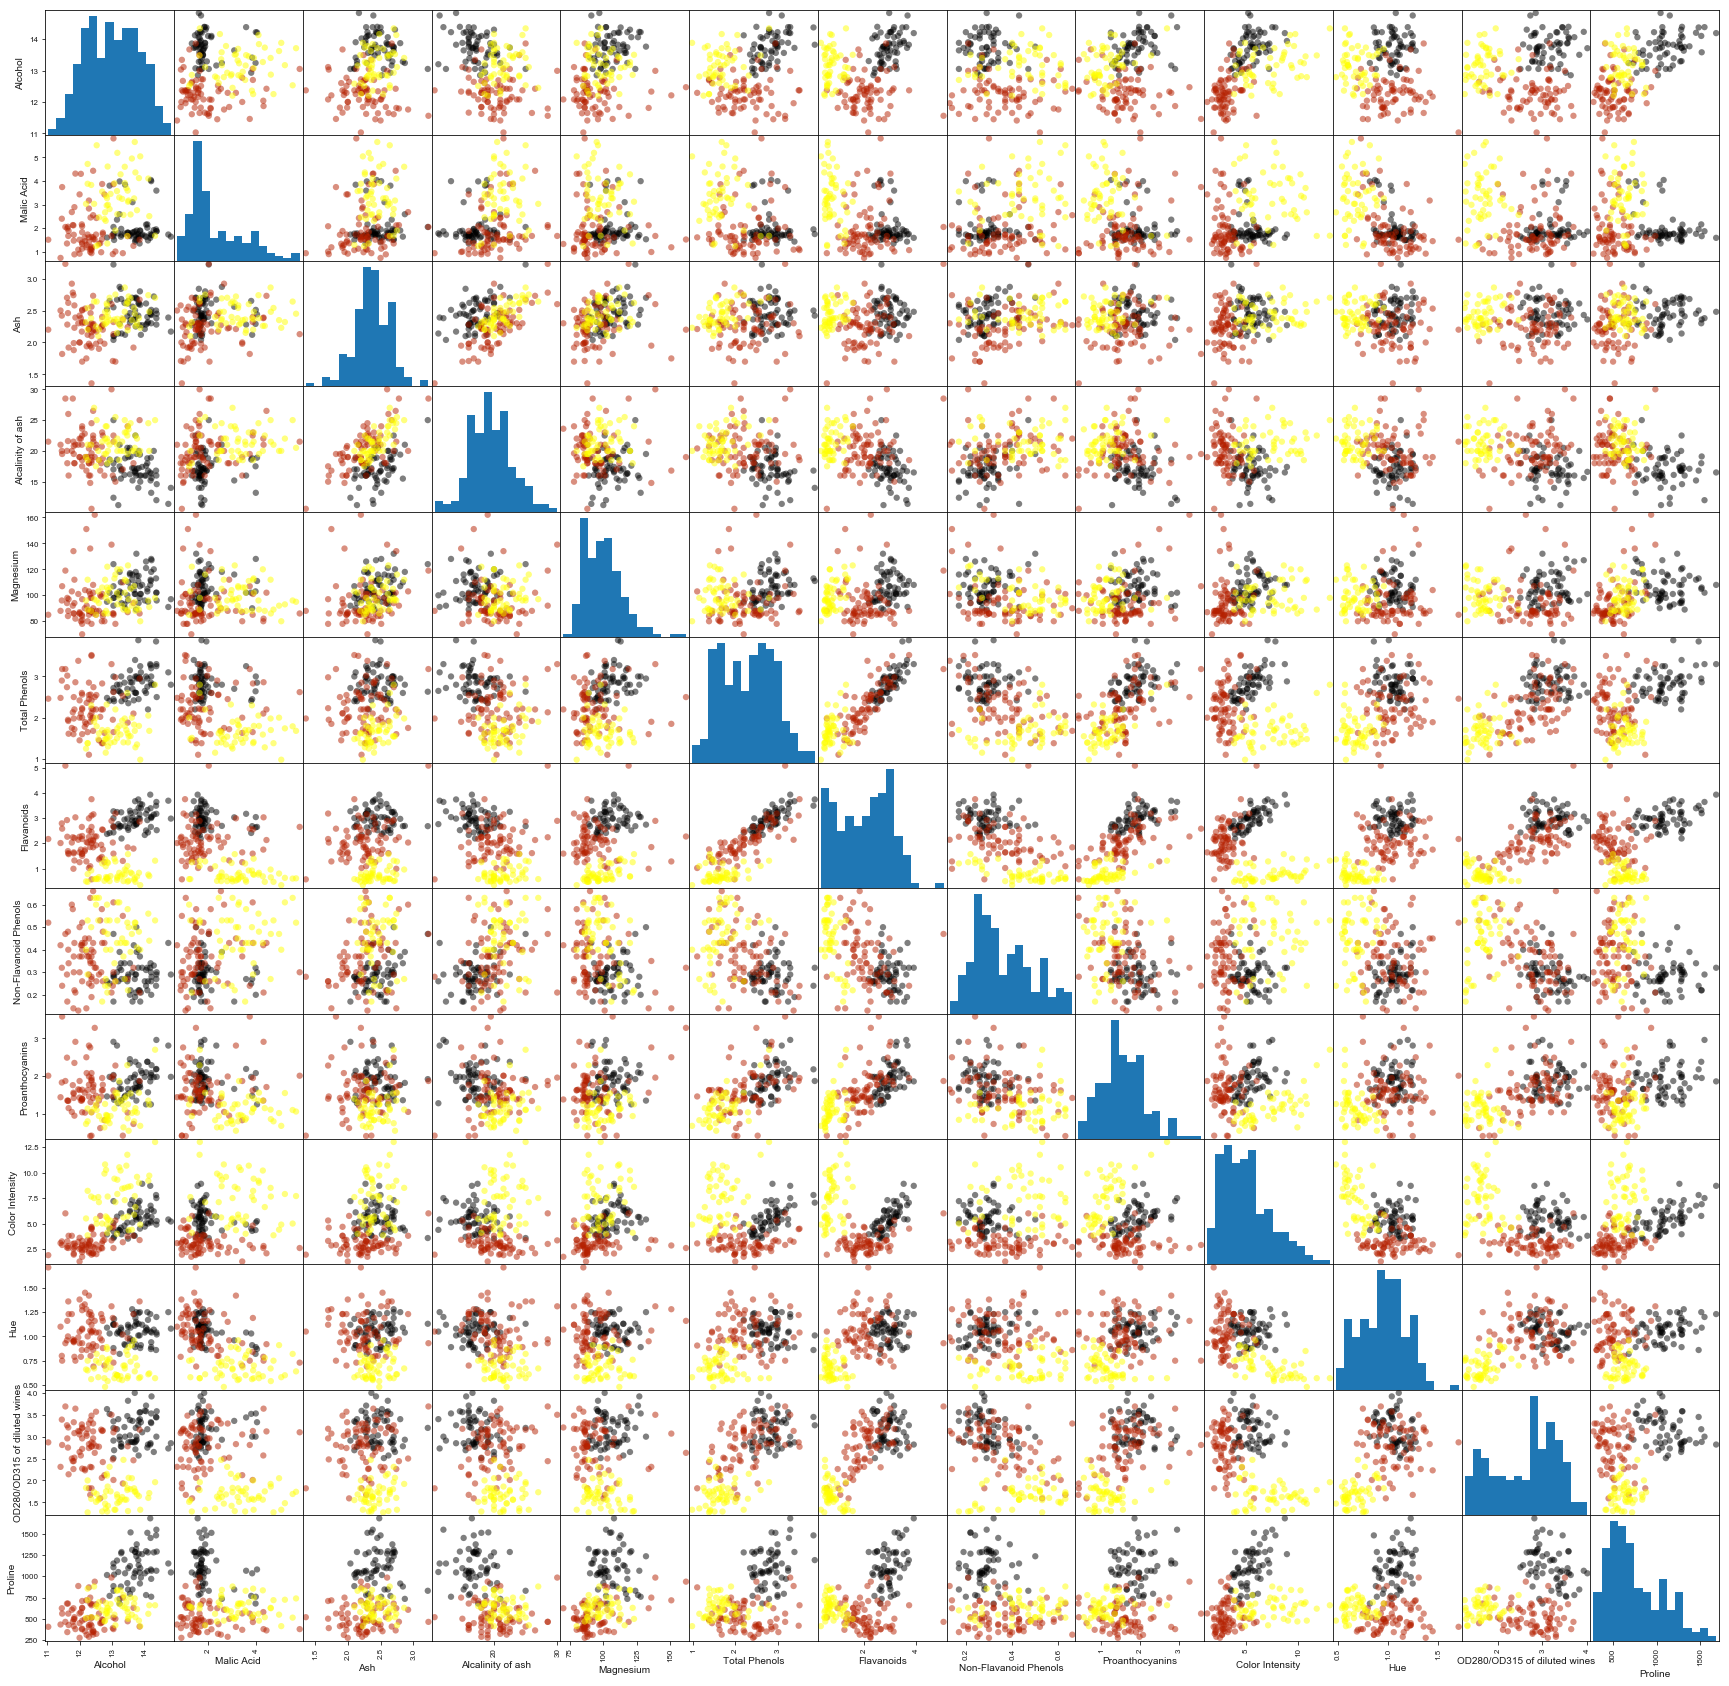

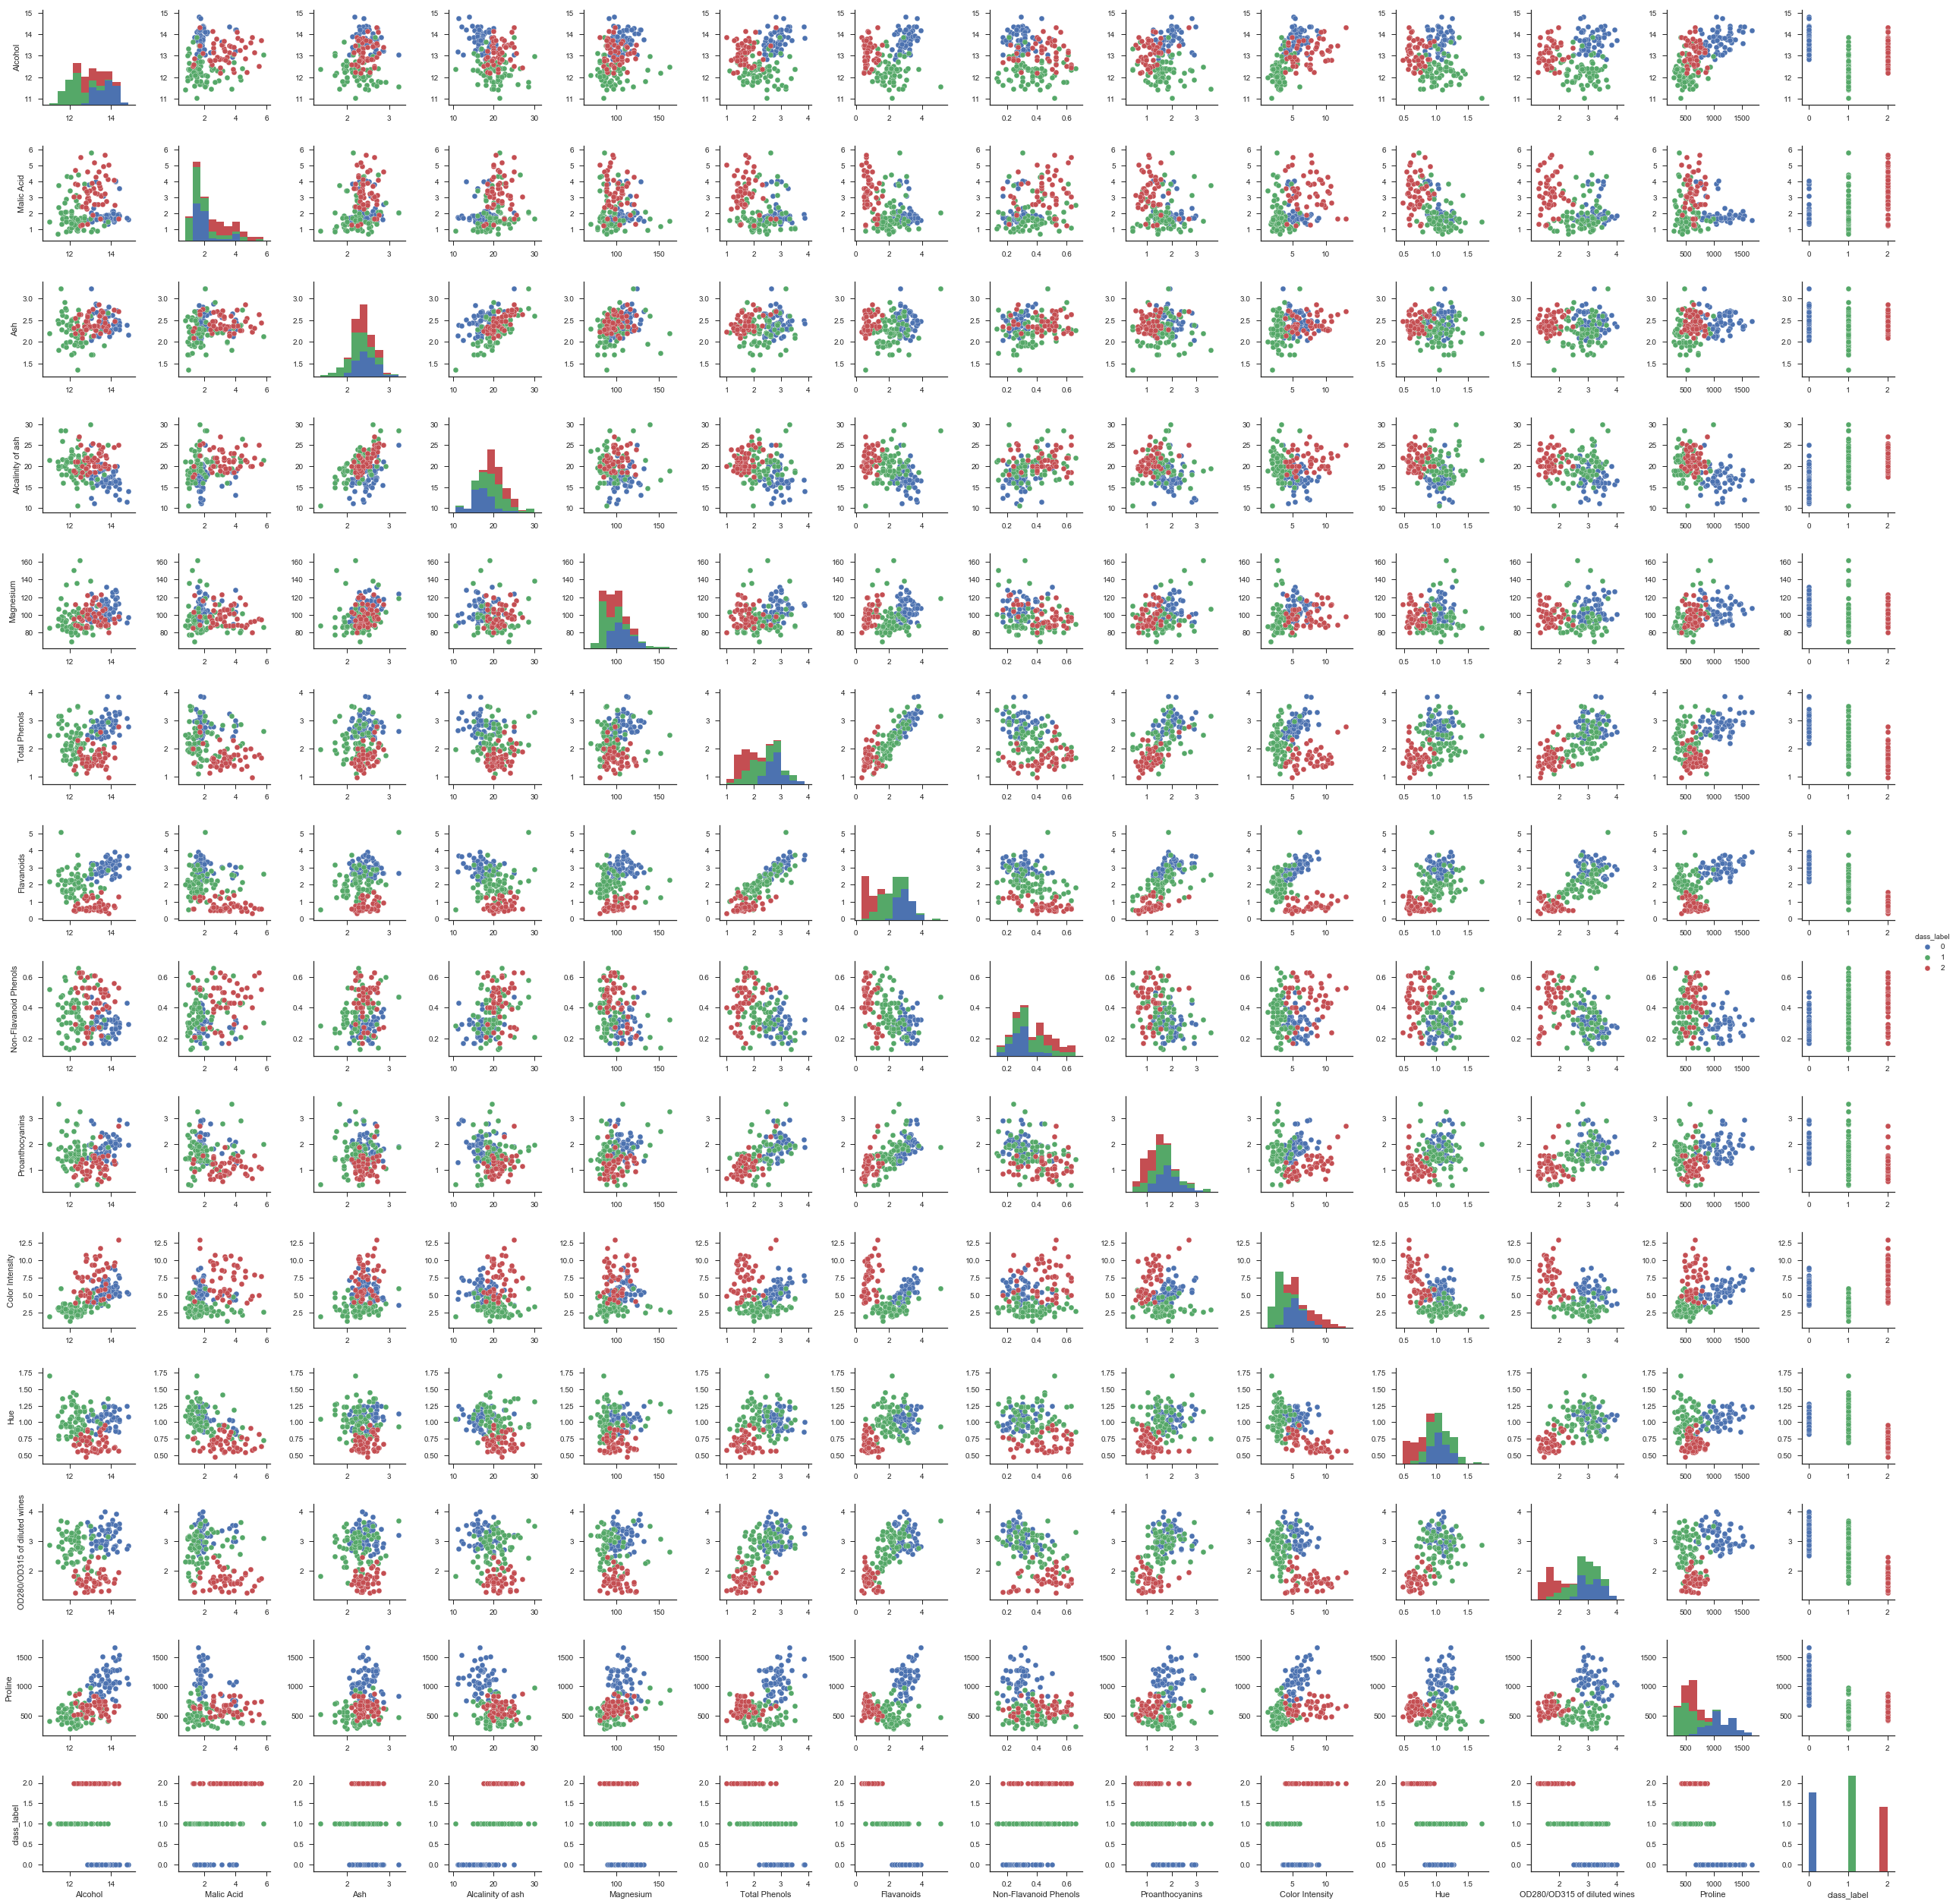

In [4]:
# Plotting a Pair plot scatter matrix - Pndas Scatter Matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix

X_wine = wine_data[['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']]
y_wine = wine_data['class_label']
fig = plt.figure()
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_wine, c=y_wine, marker='o', s=40, hist_kwds={'bins':15}, figsize=(30,30), cmap=cmap)

# Plotting a Pair plot scatter matrix - Seaborn Pairplot Scatter Matrix
sn.set(style="ticks", color_codes=True) # change style

sn.pairplot(wine_data, hue="class_label")
plt.show()

### Correlation Matrix

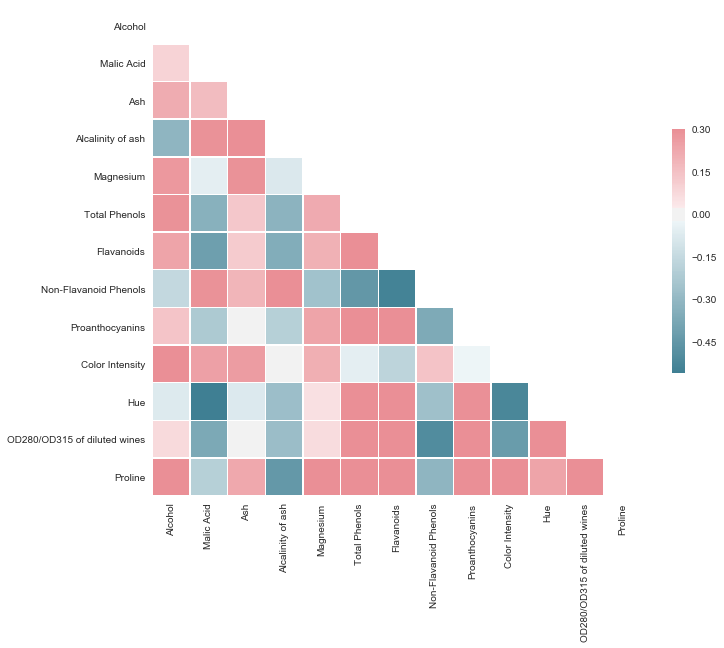

In [5]:
sn.set(style="white")

# Compute the correlation matrix
corr = X_wine.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Split the data into Test and Train sets (Random Split)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, random_state=0)

## Decision Tree Classifier

## Pure Leaf Node Case

In [7]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.93


Overfitting is evident!

### Cross Validation Score - Default Tree - 5 Fold

In [8]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X_wine, y_wine,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.81081081  0.86111111  0.83333333  0.91428571  0.85294118]
Mean cross-validation score (5-fold): 0.854


### Classification Report

In [9]:
from sklearn.metrics import classification_report

tree_predicted = clf.predict(X_test)
print(classification_report(y_test, tree_predicted, target_names=['Class_0', 'Class_1','Class_2'])) #target_names = Class names

             precision    recall  f1-score   support

    Class_0       0.94      0.94      0.94        16
    Class_1       0.95      0.90      0.93        21
    Class_2       0.89      1.00      0.94         8

avg / total       0.93      0.93      0.93        45



### Correlation Matrix

Text(0.5,16,'Predicted label')

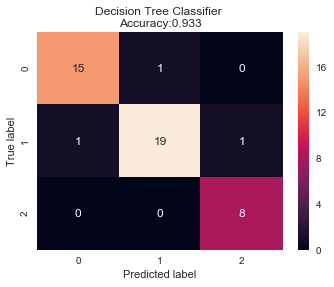

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_mc = confusion_matrix(y_test, tree_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(5.5,4))
sn.heatmap(df_cm, annot=True)
plt.title('Decision Tree Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       tree_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Visualizing decision tree - Pure Leaf Node Case

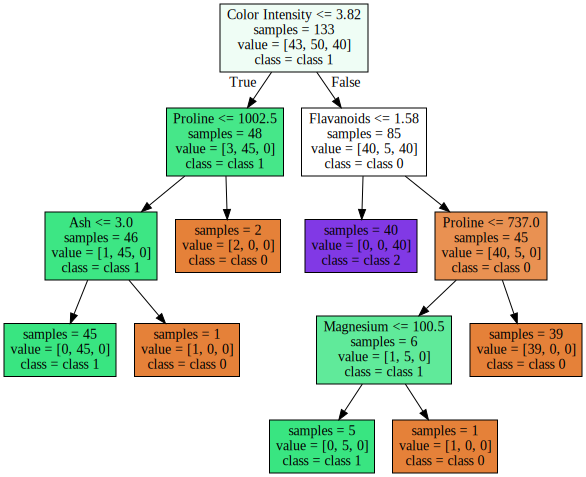

In [11]:
plot_decision_tree(clf, feature_names, target_names)

### Feature Importance Plot

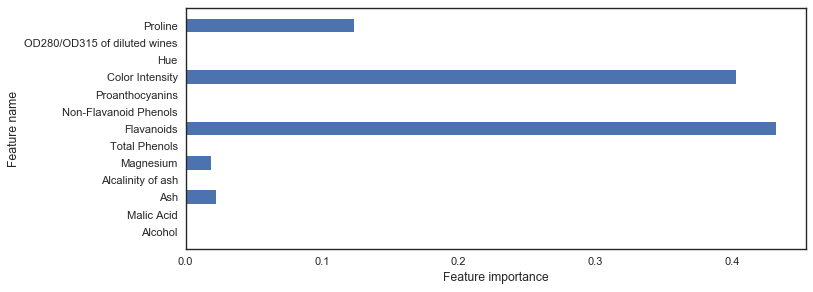

Feature importances: [ 0.          0.          0.02216502  0.          0.01888132  0.
  0.43241919  0.          0.          0.403156    0.          0.
  0.12337846]


In [12]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

# Tuning Model Complexity 

## Case 1: Setting max decision tree depth to help avoid overfitting

In [13]:
clf2 = DecisionTreeClassifier(max_depth = 3,random_state=0).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.93


### Cross Validation Score - Pre-Pruned Tree (max-depth = 3) - 5 Fold

In [14]:
cv_scores = cross_val_score(clf2, X_wine, y_wine,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.78378378  0.88888889  0.91666667  0.8         0.97058824]
Mean cross-validation score (5-fold): 0.872


### Classification Report

In [15]:
tree_predicted = clf2.predict(X_test)
print(classification_report(y_test, tree_predicted, target_names=['Class_0', 'Class_1','Class_2'])) #target_names = Class names

             precision    recall  f1-score   support

    Class_0       1.00      0.88      0.93        16
    Class_1       0.91      0.95      0.93        21
    Class_2       0.89      1.00      0.94         8

avg / total       0.94      0.93      0.93        45



### Confusion Matrix

Text(0.5,16,'Predicted label')

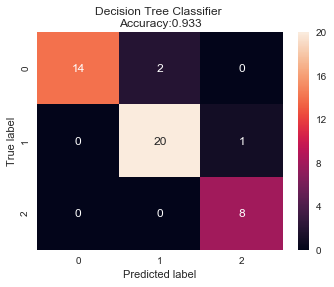

In [16]:
confusion_mc = confusion_matrix(y_test, tree_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(5.5,4))
sn.heatmap(df_cm, annot=True)
plt.title('Decision Tree Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       tree_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Visualizing Decision Tree - Pre-Pruned Version (max Depth = 3)

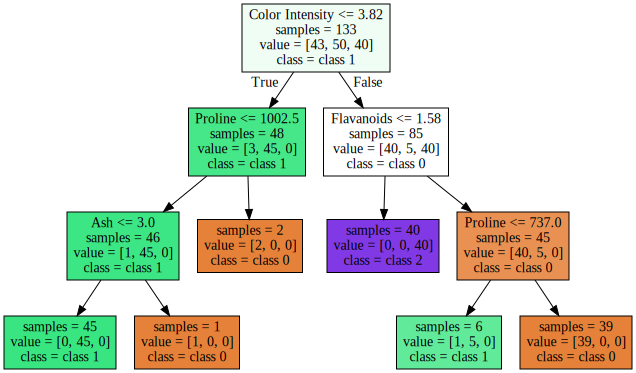

In [17]:
plot_decision_tree(clf2, feature_names, target_names)

### Decison Boundaries when 'max_depth' = 3

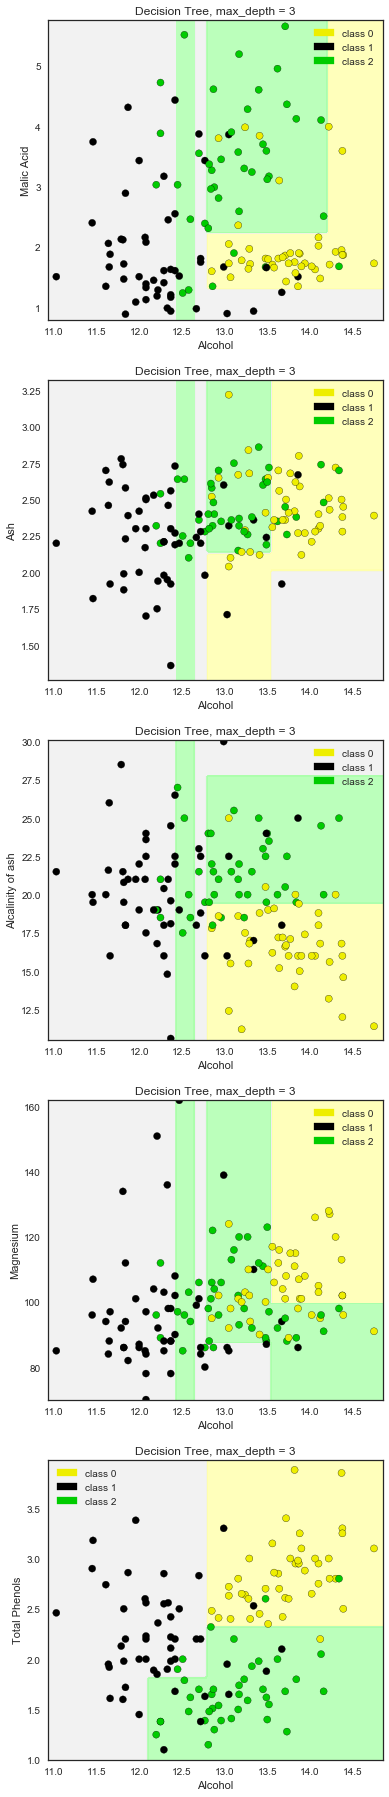

In [18]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import itertools

fig, subaxes = plt.subplots(5, 1,figsize=(6,32))

#pair_list = list(itertools.combinations(range(13), 2))
pair_list = [[0,1],[0,2],[0,3],[0,4],[0,5]] #,[0,6],[0,7],[0,8],[0,9],[0,10],[0,11],[0,12],[0,12]]
tree_max_depth = 3

for pair, axis in zip(pair_list, subaxes):
    X = np.asarray(X_train)[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names)
    
    axis.set_xlabel(feature_names[pair[0]])
    axis.set_ylabel(feature_names[pair[1]])
    
plt.show()

## Checking How 'max_depth' parameter affect Decision Tree Accuracy

### Cross Validation Curve

In [19]:
from sklearn.model_selection import validation_curve

param_range = list(range(1,5))
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=0), X_wine, y_wine,
                                            param_name='max_depth',
                                            param_range=param_range, cv=5)

In [20]:
param_range

[1, 2, 3, 4]

In [21]:
print(train_scores)

[[ 0.70921986  0.6971831   0.6971831   0.67132867  0.6875    ]
 [ 0.9787234   0.92957746  0.93661972  0.8951049   0.90972222]
 [ 1.          0.97887324  0.98591549  0.95104895  0.97222222]
 [ 1.          0.98591549  0.98591549  0.97202797  0.98611111]]


In [22]:
print(test_scores)

[[ 0.56756757  0.69444444  0.69444444  0.6         0.73529412]
 [ 0.7027027   0.86111111  0.77777778  0.74285714  0.97058824]
 [ 0.78378378  0.88888889  0.91666667  0.8         0.97058824]
 [ 0.78378378  0.86111111  0.88888889  0.91428571  0.97058824]]


In [23]:
train_scores_avg = np.mean(test_scores,axis=1)
train_scores_avg

array([ 0.65835011,  0.81100739,  0.87198551,  0.88373155])

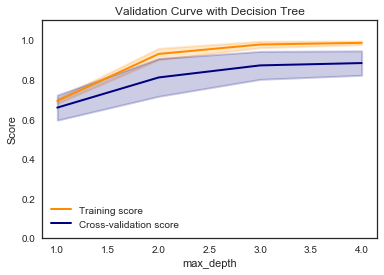

In [24]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.plot(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Case 2: Checking How 'max_leaf_nodes' parameter affect Decision Tree Accuracy

In [25]:
param_range = list(range(2,5))
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=0), X_wine, y_wine,
                                            param_name='max_leaf_nodes',
                                            param_range=param_range, cv=5)

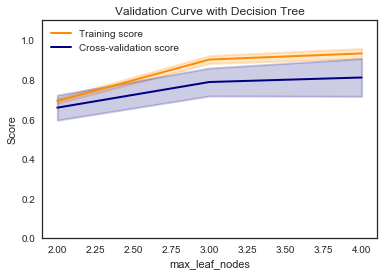

In [26]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with Decision Tree')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.plot(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Case 3: Checking How 'min_split_samples' Parameter Affect Decsion Tree Accuracy

In [27]:
param_range = list(range(2,11))
train_scores, test_scores = validation_curve(DecisionTreeClassifier(random_state=0), X_wine, y_wine,
                                            param_name='min_samples_split',
                                            param_range=param_range, cv=5)

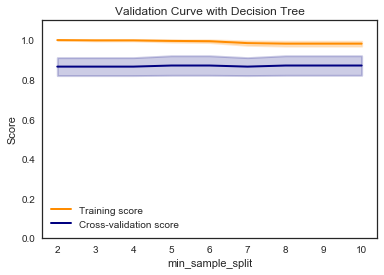

In [28]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with Decision Tree')
plt.xlabel('min_sample_split')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.plot(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Case 4: Grid Search - Optimizing all Parameters Simultaneously - Exhaustive Search

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(random_state=0)
grid_values = {'max_depth': [1,2,3,4],'max_leaf_nodes':[2,3,4], 'min_samples_split' : [2,3,4,5,6,7,8,9,10]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.predict(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)
results = pd.DataFrame(grid_clf_acc.cv_results_)

Grid best parameter (max. accuracy):  {'max_depth': 1, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Grid best score (accuracy):  0.894736842105


c:\users\raksh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\raksh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\raksh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  wa

In [30]:
results

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.002550         0.000000         0.609023          0.661887   
1         0.001709         0.001005         0.609023          0.661887   
2         0.001656         0.000669         0.609023          0.661887   
3         0.001002         0.000334         0.609023          0.661887   
4         0.000988         0.000000         0.609023          0.661887   
5         0.000334         0.000000         0.609023          0.661887   
6         0.000000         0.000000         0.609023          0.661887   
7         0.000705         0.000347         0.609023          0.661887   
8         0.001003         0.000000         0.609023          0.661887   
9         0.000336         0.000000         0.864662          0.943470   
10        0.000000         0.000000         0.864662          0.943470   
11        0.000375         0.000000         0.864662          0.943470   
12        0.000000         0.000000         0.864662          0.943470   
13        0.005664         0.000000         0.864662          0.943470   
14        0.000000         0.000000         0.864662          0.943470   
15        0.000335         0.000000         0.864662          0.943470   
16        0.000000         0.005267         0.864662          0.943470   
17        0.005228         0.000000         0.864662          0.943470   
18        0.000335         0.000000         0.894737          0.954837   
19        0.000000         0.005230         0.894737          0.954837   
20        0.000000         0.000000         0.894737          0.954837   
21        0.005209         0.000000         0.894737          0.954837   
22        0.005207         0.000104         0.894737          0.954837   
23        0.005226         0.000000         0.894737          0.954837   
24        0.000674         0.000000         0.894737          0.954837   
25        0.000000         0.000000         0.894737          0.954837   
26        0.000000         0.000000         0.894737          0.954837   
27        0.005643         0.000000         0.609023          0.661887   
28        0.000381         0.000000         0.609023          0.661887   
29        0.000000         0.000000         0.609023          0.661887   
..             ...              ...              ...               ...   
78        0.000334         0.000000         0.879699          0.980971   
79        0.000000         0.005288         0.879699          0.980971   
80        0.001012         0.000000         0.879699          0.980971   
81        0.000000         0.005231         0.609023          0.661887   
82        0.000000         0.005225         0.609023          0.661887   
83        0.000000         0.000000         0.609023          0.661887   
84        0.005209         0.000000         0.609023          0.661887   
85        0.000681         0.000000         0.609023          0.661887   
86        0.000000         0.000000         0.609023          0.661887   
87        0.000000         0.000000         0.609023          0.661887   
88        0.000000         0.005230         0.609023          0.661887   
89        0.000000         0.000000         0.609023          0.661887   
90        0.005207         0.000000         0.864662          0.943470   
91        0.000000         0.000000         0.864662          0.943470   
92        0.005627         0.000334         0.864662          0.943470   
93        0.000334         0.000000         0.864662          0.943470   
94        0.000000         0.005263         0.864662          0.943470   
95        0.005228         0.000000         0.864662          0.943470   
96        0.000000         0.005210         0.864662          0.943470   
97        0.000000         0.000000         0.864662          0.943470   
98        0.000000         0.000000         0.864662          0.943470   
99        0.005208         0.000000         0.879699          0.980971   
100      

## Building Optimal Decision Tree based on Grid Seatch Values

In [31]:
clf_O = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes = 4, min_samples_split = 2).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.3f}'
     .format(clf_O.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.3f}'
     .format(clf_O.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.955
Accuracy of Decision Tree classifier on test set: 0.844


### Cross Validation Scores

In [32]:
cv_scores = cross_val_score(clf_O, X_wine, y_wine,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.7027027   0.88888889  0.77777778  0.74285714  0.97058824]
Mean cross-validation score (5-fold): 0.817


### Classification Report

In [33]:
tree_predicted = clf_O.predict(X_test)
print(classification_report(y_test, tree_predicted, target_names=['Class_0', 'Class_1','Class_2'])) #target_names = Class names

             precision    recall  f1-score   support

    Class_0       0.75      0.94      0.83        16
    Class_1       0.94      0.71      0.81        21
    Class_2       0.89      1.00      0.94         8

avg / total       0.86      0.84      0.84        45



### Confusion Matrix

Text(0.5,16,'Predicted label')

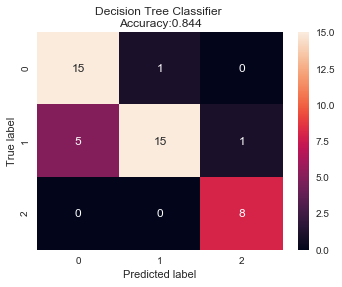

In [34]:
confusion_mc = confusion_matrix(y_test, tree_predicted)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(5.5,4))
sn.heatmap(df_cm, annot=True)
plt.title('Decision Tree Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       tree_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Visualizing Optimal Decision Tree

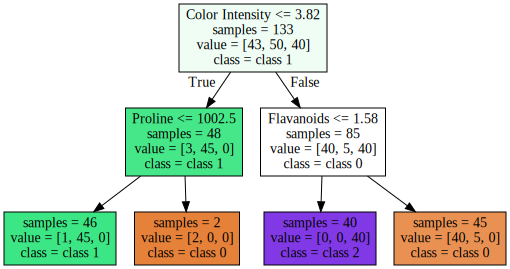

In [35]:
plot_decision_tree(clf_O, feature_names, target_names)

# Dimension Reduction using PCA

In [36]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x_pca = pca.fit_transform(X_wine)
# Percentage of variance explained for each components 
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Test-train split on PCA reduced data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca,y_wine,random_state=0) 

explained variance ratio (first two components): [  9.98091230e-01   1.73591562e-03   9.49589576e-05   5.02173562e-05]


In [37]:
clf_dm = DecisionTreeClassifier().fit(X_pca_train,y_pca_train)

### Visualize Decision Tree for PCA Reduced Data

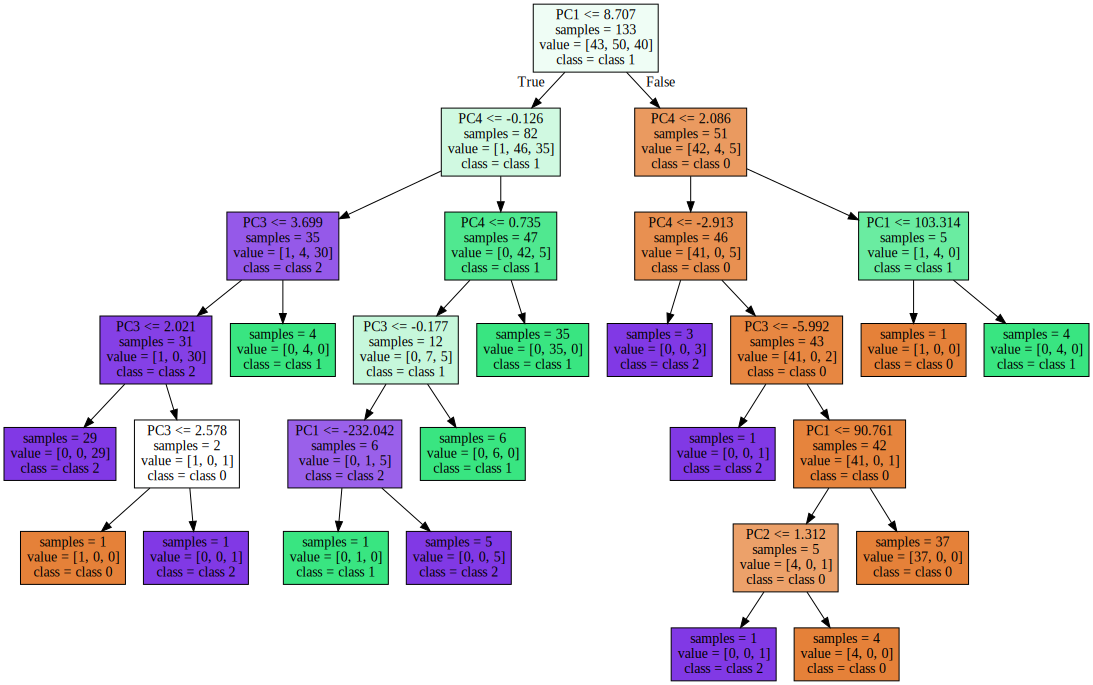

In [38]:
pca_feature_names = ['PC1','PC2','PC3','PC4']
plot_decision_tree(clf_dm, pca_feature_names, target_names)

### Feature Importance Plot

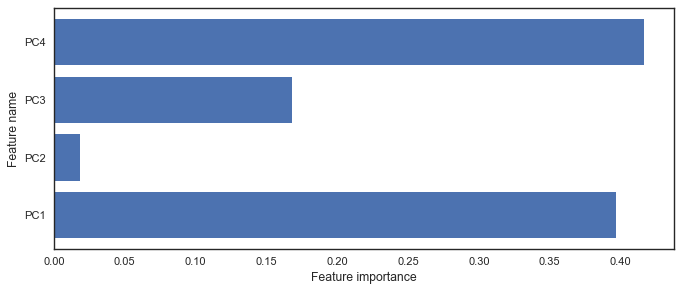

Feature importances: [ 0.39693792  0.01812606  0.16798601  0.41695   ]


In [39]:
plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf_dm, pca_feature_names)
plt.show()

print('Feature importances: {}'.format(clf_dm.feature_importances_))

## Creating Pipeline for PCA and Decision Tree

### Analyzing how # of Principal Components affect Accuracy of Classifier

In [40]:
from sklearn.pipeline import make_pipeline

pca_clf = make_pipeline(PCA(n_components=4), DecisionTreeClassifier(max_depth=3))

In [41]:
pca_clf.fit(X_pca_train, y_pca_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(pca_clf.score(X_pca_train, y_pca_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(pca_clf.score(X_pca_test, y_pca_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.93


### Cross Validation 

In [42]:
cv_scores = cross_val_score(pca_clf, X_wine, y_wine,cv=5) #5-fold cross validation

print('Cross-validation scores {5-fold}: ',cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
      .format(np.mean(cv_scores)))

Cross-validation scores {5-fold}:  [ 0.75675676  0.86111111  0.83333333  0.91428571  0.94117647]
Mean cross-validation score (5-fold): 0.861
